In [1]:
import pandas as pd
pd.options.display.max_columns=100
import numpy as np
from directory import data as data_dir, images

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep')
%matplotlib inline
from paxplot import centroid_plot, cluster_plots

plt.rcParams['font.size'] = 16
sns.set_style(style={'axes.spines.left': True,
 'axes.spines.bottom': True})
sns.set_context(rc = {'patch.linewidth': 0.0})

In [4]:
a = pd.read_csv("{}/tableau_tracts.csv".format(data_dir))

In [21]:
a[a.geoid >= 7000000000].sort_values('geoid').head(20)

,Unnamed: 0,geoid,oz,LICadj,eligible,k=6,k6silhouette_score,not_picked
12559,12559,8001007801,0,0,1,NaN,NaN,1
11799,11799,8001007802,0,0,1,NaN,NaN,1
11810,11810,8001007900,0,0,1,NaN,NaN,1
11853,11853,8001008000,0,0,1,NaN,NaN,1
11703,11703,8001008100,1,0,1,5.0,0.095394,0
12076,12076,8001008200,0,0,1,NaN,NaN,1
11843,11843,8001008308,0,0,1,NaN,NaN,1
12078,12078,8001008309,0,0,1,NaN,NaN,1
12079,12079,8001008353,1,0,1,4.0,-0.012163,0
11811,11811,8001008401,0,1,1,NaN,NaN,1


In [4]:
clean = pd.read_pickle("{}/clean.pkl".format(data_dir))
raw = pd.read_pickle("{}/census_raw.pkl".format(data_dir))

In [5]:
suspect_geoids = ['24033806400', '24033807000', '12086000109', '22071013400', '48201100000', '23005000300', '12099001700']
a = ozs[ozs['geoid'].isin(suspect_geoids)]
a.to_pickle("{}/suspect_tracts.pkl".format(data_dir))

NameError: name 'ozs' is not defined

In [6]:
from sklearn.decomposition import NMF
import sklearn.preprocessing as prepro
drop_cols = ['population_total2017', 'household_income_median2017',
       'home_value_median2017', 'housing_units_total2017', 'geoid', 'oz', 'LICadj', 'eligible']

In [7]:
e = clean[clean['eligible'] == 1]
ozs = clean[clean['oz'] == 1]

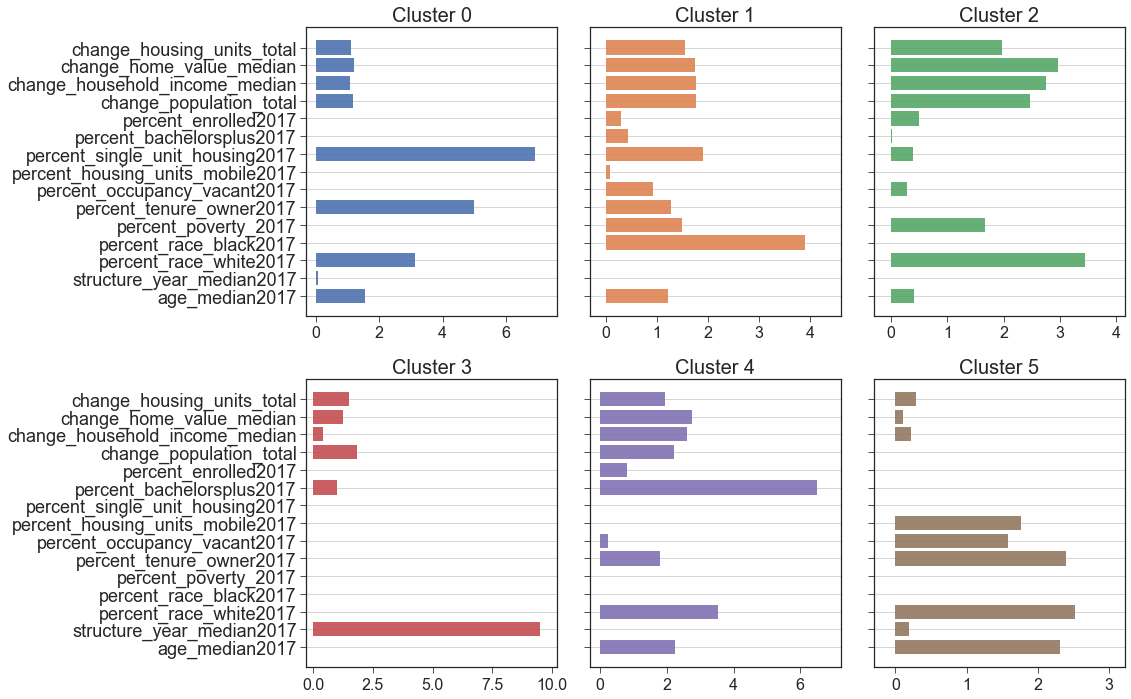

In [8]:
X = ozs.drop(columns=drop_cols)
mm_scaler = prepro.MinMaxScaler()
std_X = mm_scaler.fit_transform(X.values)

for n in range(6, 7):
    paxNMF = NMF(n_components=n)
    w = paxNMF.fit_transform(std_X)
    h = paxNMF.components_
    cluster_plots(paxNMF.components_, X.columns)
    plt.savefig("{}/nmf/NMF{}.png".format(images, n), dpi=120, transparent=True)

In [10]:
mean_eligible = np.mean(e, axis = 0)
mean_oz = np.mean(ozs, axis = 0)

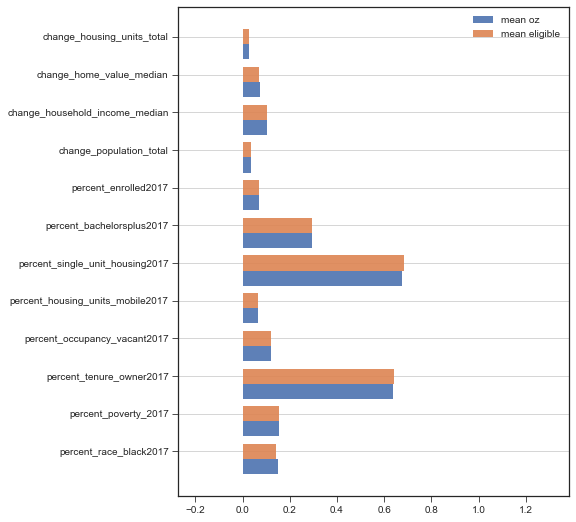

In [37]:
## figure out how to show this
barWidth = 0.4

f, ax = plt.subplots(figsize = (7, 9))

centroid, features = mean_oz[7:-4], mean_oz.index[7:-4]
y = np.arange(len(centroid))
kwargs={'color':palette.as_hex()[0], 'alpha':0.9, 'label':"mean oz", 'height':barWidth}
bars = ax.barh(y, centroid, tick_label=features, **kwargs)

centroid, features = mean_eligible[7:-4], mean_eligible.index[7:-4]
y = np.arange(len(centroid))
kwargs={'color':palette.as_hex()[1], 'alpha':0.9, 'label':"mean eligible", 'align':'center', 'height':barWidth}
bars = ax.barh(y + barWidth, centroid, tick_label=features, **kwargs)
ax.set_xlim(np.min(centroid) - 0.3, np.max(centroid) + 0.7)
ax.grid(axis='y')

ax.legend()

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep')
%matplotlib inline
from paxplot import centroid_plot, cluster_plots

sns.set_style(style={'axes.spines.left': True,
 'axes.spines.bottom': True})
sns.set_context(rc = {'patch.linewidth': 0.0})

In [13]:
corrf = clean.drop(columns=drop_cols).corr()

In [14]:
mask = np.zeros_like(corrf)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

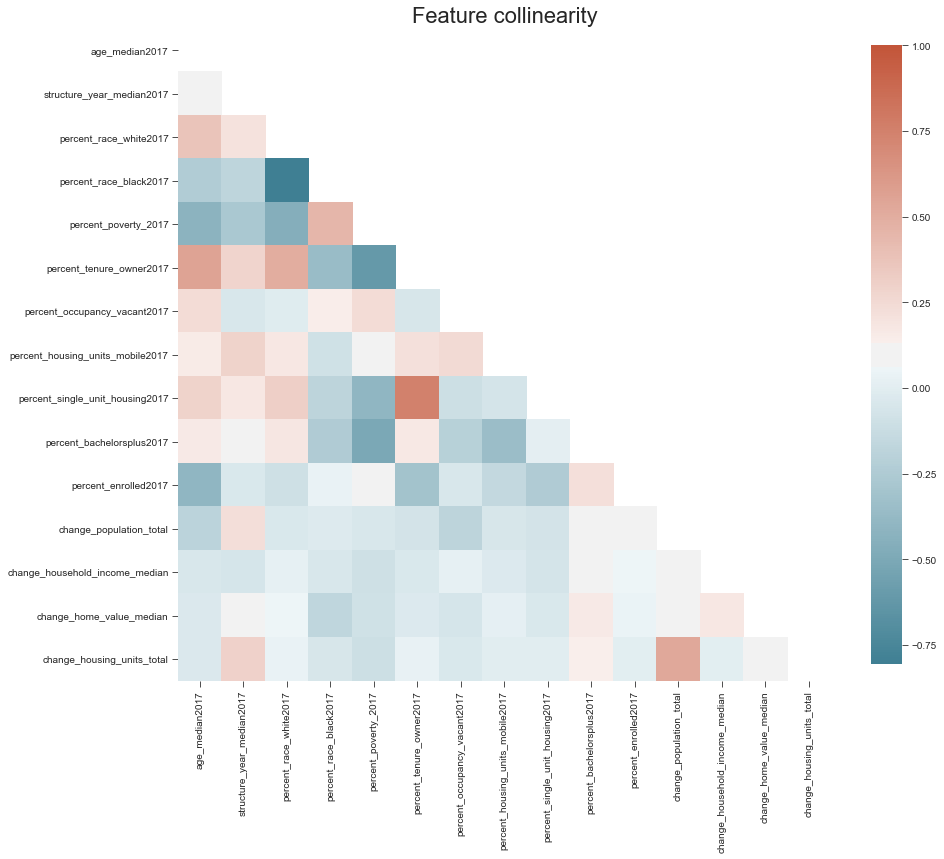

In [16]:
f, ax = plt.subplots(figsize=(14, 14))
colormap = sns.diverging_palette(220, 20, as_cmap=True)
ax.set_title("Feature collinearity", fontsize=22)
sns.heatmap(corrf, square=True, cmap=colormap, cbar_kws={"shrink":0.7}, mask=mask, ax=ax)
ax.set_ylim(len(corrf), 0)
f.tight_layout()

In [62]:
clean = pd.read_pickle("{}/clean.pkl".format(data_dir))[clean.columns[-4:]]
labels = pd.read_pickle("{}/kmeans/labels.pkl".format(data_dir))#[labels.columns[6:8]]
labels.head()

,k=3,k3silhouette_score,k=4,k4silhouette_score,k=5,k5silhouette_score,k=6,k6silhouette_score,k=7,k7silhouette_score,k=8,k8silhouette_score,k=9,k9silhouette_score
0,0,0.314868,2,0.286692,2,0.318471,2,0.295360,6,0.249117,2,0.301640,2,0.305770
1,1,0.134294,3,0.204382,0,0.225334,3,0.250697,3,0.234173,4,0.233484,7,0.248565
2,0,0.237015,2,0.228614,2,0.224890,2,0.236396,6,0.212289,2,0.282366,2,0.291046
3,1,0.061888,3,0.121264,0,0.125439,3,0.142260,3,0.143767,4,0.103398,7,0.110330
4,1,0.108964,3,0.156172,0,0.167101,3,0.178718,3,0.181710,4,0.166608,7,0.150347


In [68]:
ozs = clean[clean['oz'] == 1].reset_index(drop=True)

In [71]:
ozs = pd.concat([ozs, labels], axis=1)
ozs.head()

,geoid,oz,LICadj,eligible,k=3,k3silhouette_score,k=4,k4silhouette_score,k=5,k5silhouette_score,k=6,k6silhouette_score,k=7,k7silhouette_score,k=8,k8silhouette_score,k=9,k9silhouette_score
0,01007010002,1,0,1,0,0.314868,2,0.286692,2,0.318471,2,0.295360,6,0.249117,2,0.301640,2,0.305770
1,01087231603,1,0,1,1,0.134294,3,0.204382,0,0.225334,3,0.250697,3,0.234173,4,0.233484,7,0.248565
2,01087231500,1,0,1,0,0.237015,2,0.228614,2,0.224890,2,0.236396,6,0.212289,2,0.282366,2,0.291046
3,01087232200,1,0,1,1,0.061888,3,0.121264,0,0.125439,3,0.142260,3,0.143767,4,0.103398,7,0.110330
4,01105687000,1,0,1,1,0.108964,3,0.156172,0,0.167101,3,0.178718,3,0.181710,4,0.166608,7,0.150347


In [35]:
clean = clean.merge(ozs, how="left")
clean.columns

Index(['geoid', 'oz', 'LICadj', 'eligible', 'labelk6', 'silhouettek6'], dtype='object')

In [46]:
clean['not_picked'] = (clean.eligible +  clean.oz) % 2

In [48]:
clean.to_csv("{}/tableau_tracts.csv".format(data_dir))

In [72]:
run make_tableau_tracts.py